# EDA for Eurivision Song Contest results
In particular, I plan to check whether:
* the basic assumptions of the contest rules are met, i. e. number of members;
* televote points differ significantly from jury points;
* there are mutual sympathies between countries, i.e. whether there are countries that rate each other particularly highly.


### Eurovision contest rules in brief:

NUMBER OF PARTICIPATING BROADCASTERS

A **maximum of 44 Members** shall be allowed to participate (the "Participating Broadcasters"). 

Members from a maximum total of **26 countries shall compete in the Final.** 

There shall be **six guaranteed places** therein, i.e. one for the producing organization, i.e. **the Member which has won the preceding edition** (the "Host Broadcaster"), and **the five Members from France, Germany, Spain, Italy and the United Kingdom** (the “Big 5”). Subject to a decision by the EBU in consultation with the Reference Group, the number of guaranteed places in the Final may be modified depending on circumstances. 

Apart from the six broadcasters with guaranteed places, all Participating Broadcasters from a maximum of 38 countries shall compete in one of the Semi-Finals for the remaining places in the Final.

POINTS
(i) NATIONAL AUDIENCES

In each country, the song which has received the highest number of votes from the National Audience shall be ranked first, the song which has received the second highest number of votes shall be ranked second and so on until the last song.

(ii) NATIONAL JURIES

The national jurors shall rank first their favourite song, second, their second favourite song, third, their third favourite song, and so on until their least favourite song which shall be ranked last. Abstentions are not allowed, except that the song representing the country of the Participating Broadcaster which has appointed the National Jury shall be excluded from the vote. It is not allowed to award the same rank to two different songs.

(iii) AWARD OF THE POINTS

In both Semi-Finals and in the Final, it being for the National Audiences or for the National Juries, the results in each country shall be determined as follows: 


* **12 points shall be allocated to the song having obtained the best rank;**
* **10 points to the song having obtained the second-best rank,**
* **8 points to the song having obtained the third-best rank,**
* **7 points to the next,**
* **and so on, down to 1 point for the song having obtained the tenth-best rank.**

RESULTS
The points of the National Audiences and of the National Juries shall be combined according to a ratio which is determined by the EBU, subject to the Reference Group approval.

For example, if the ratio is 50-50, the points of the National Jury carry the same weight as the points of the National Audiences.

The televoting results of the National Audiences for each song across all participating countries are added progressively to the scoreboard as long as the results are announced. 

The televoting points from the National Audiences from all participating countries are combined with the points of the National Juries, providing one combined score for each song.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# from scipy.stats import chi2
import scipy.stats

In [79]:
path = r'D:\Praca\Data_Science\SDA_Kurs\20230617_Przetwarzanie\ML-datasets-master'
path = path.replace('\\','/')+'/eurovision.csv'
df = pd.read_csv(path)
df

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1061,United Kingdom,Ukraine,11,1,1,1,5,2,6,10.0,5.0
1062,United Kingdom,Malta,18,13,8,17,4,12,15,NaN,NaN
1063,United Kingdom,Georgia,2,2,3,2,1,1,19,12.0,NaN
1064,United Kingdom,Austria,23,15,12,18,13,17,13,NaN,NaN


## Basic analysis

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From country     1066 non-null   object 
 1   To country       1066 non-null   object 
 2   Jury A           1066 non-null   int64  
 3   Jury B           1066 non-null   int64  
 4   Jury C           1066 non-null   int64  
 5   Jury D           1066 non-null   int64  
 6   Jury E           1066 non-null   int64  
 7   Jury Rank        1066 non-null   int64  
 8   Televote Rank    1066 non-null   int64  
 9   Jury Points      420 non-null    float64
 10  Televote Points  420 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 91.7+ KB


In [81]:
df.describe()

,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,420.000000,420.000000
mean,13.195122,13.195122,13.195122,13.195122,13.195122,13.195122,13.195122,5.800000,5.800000
std,7.332698,7.332698,7.332698,7.332698,7.332698,7.332698,7.332698,3.344643,3.344643
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,3.000000,3.000000
50%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,5.500000,5.500000
75%,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,8.000000,8.000000
max,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,12.000000,12.000000


Max and min for each jury and both jury and televote ranks are 26 and 1 respectively, which is correct.

In [82]:
jury_points = df['Jury Points'].unique()
print(sorted(jury_points))

televote_points = df['Televote Points'].unique()
print(sorted(televote_points))

[nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0]
[nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0]


Points were assigned according to the contest rules (min = 1, max = 12, no country received 9 or 11 points)

Checking the number of participants:

In [83]:
voting_countries = df['From country'].unique()
print(sorted(voting_countries))
number_of_participants = len(voting_countries)
print(number_of_participants)

rated_countries = df['To country'].unique()
print(sorted(rated_countries))
number_of_contestants = len(rated_countries)
print(number_of_contestants)

['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Montenegro', 'Norway', 'Poland', 'Russia', 'San Marino', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'Ukraine', 'United Kingdom']
42
['Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'France', 'Georgia', 'Germany', 'Hungary', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Poland', 'Russia', 'Serbia', 'Spain', 'Sweden', 'The Netherlands', 'Ukraine', 'United Kingdom']
26


Checking, if the Big 5 is among the rated countries:

In [84]:
the_big_5 = ['France', 'Germany', 'Spain', 'Italy', 'United Kingdom']
check = all(item in rated_countries for item in the_big_5)
check

True

There are 42 voting countries, which is correct.

There are only 26 countries that are rated. Based on the contest rules, I conclude that the table shows the results of the Final. The Big 5 is among the final contestants.

Interestingly, Australia is visible among both voting and rated countries. <br>
Explanation: https://en.wikipedia.org/wiki/Australia_in_the_Eurovision_Song_Contest
Australia was first invited to take part as a special ‘guest country’ back in 2015 as part of the contest’s 60th anniversary celebrations. The invitation was extended to them on the basis that they’re huge fans of Eurovision in Australia, with the show having been broadcast there every year since 1983.

Checking the size of the dataset:
* is the number of rows correct?
* is the number of non-null counts in columns Jury Points and Televote Points correct?
* are there countries that voted for themselves?
* are there duplicates?

In [85]:
# number of rows: there are 42 countries that may vote for final 26 contestants. 
# 26 Final contestants musn't vote for themselves.
number_of_participants*number_of_contestants - number_of_contestants == len(df.index)

True

In [86]:
# non-null counts in columns Jury Points and Televote Points; each country assigns points to 10 contestants
number_of_jury_votes = len(df.loc[df['Jury Points'].notnull()].index)
number_of_televote_votes = len(df.loc[df['Televote Points'].notnull()].index)
votes_per_country = 10
print(number_of_participants*votes_per_country == number_of_jury_votes)
print(number_of_participants*votes_per_country == number_of_televote_votes)

True
True


In [87]:
# voting for itself
df[df['From country']==df['To country']]

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points


In [88]:
df[df.duplicated()]

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points


The number of rows and non-null values in the dataset is correct.
No country voted for itself. There are no duplicated rows.

## Investigation of points assigned in the contest

### Jury results

Just to check if points were assigned correctly (corresponding to the resulting Jury A-E order) it is sufficient to replace Jury A-E columns with their sum

In [89]:
df['Jury Summary Order'] = df['Jury A'] + df['Jury B'] + df['Jury C'] + df['Jury D']+ df['Jury E']
df.drop(columns = ['Jury A', 'Jury B', 'Jury C', 'Jury D', 'Jury E'], inplace=True)

# change column order:
df = df[['From country','To country','Jury Summary Order','Jury Rank','Televote Rank','Jury Points','Televote Points']]

df_jury = df[['From country','To country','Jury Summary Order','Jury Rank','Jury Points']].dropna().sort_values(by=['From country','Jury Summary Order', 'Jury Rank'])
df_jury

,From country,To country,Jury Summary Order,Jury Rank,Jury Points
12,Albania,Australia,8,1,12.0
10,Albania,France,23,2,10.0
5,Albania,Italy,26,3,8.0
17,Albania,Russia,30,4,7.0
18,Albania,Spain,34,5,6.0
...,...,...,...,...,...
1048,United Kingdom,Bulgaria,47,6,5.0
1056,United Kingdom,Lithuania,50,7,4.0
1047,United Kingdom,Israel,52,8,3.0
1055,United Kingdom,Serbia,52,9,2.0


Text(0, 0.5, 'Jury Order')

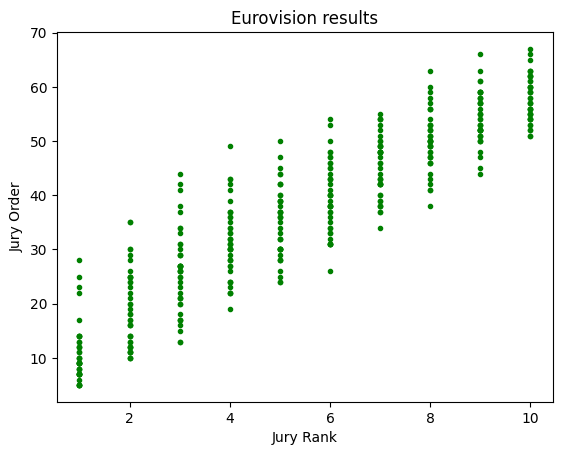

In [90]:
#checking monotonicity of the function, where x = Jury Rank, y = Jury Summary Order 
fig, ax = plt.subplots()


for country in voting_countries:
    df_jury_country = df_jury[df_jury['From country'] == country]
    colors = np.where(((df_jury_country['Jury Summary Order'] >= df_jury_country['Jury Summary Order'].shift(1)) 
                       |(df_jury_country['Jury Rank'] == 1)),'green', 'red')
    df_jury_country_g = df_jury_country.loc[colors == 'green',:].copy()
    df_jury_country_r = df_jury_country.loc[colors == 'red',:].copy() 
    
    ax.plot(df_jury_country_g['Jury Rank'], df_jury_country_g['Jury Summary Order'], 
            marker = '.', color = 'green', linestyle = 'None', label = country)
    ax.plot(df_jury_country_r['Jury Rank'], df_jury_country_r['Jury Summary Order'], 
            marker = '.', color = 'red', linestyle = 'None', label = country)
    
ax.set_title('Eurovision results')
ax.set_xlabel('Jury Rank')
ax.set_ylabel('Jury Order')

The scatterplot is correct: the higher Jury Rank is, the higher Jury Order is. Only points Jury Rank = 1 are red due to methodology. However, the first points are only a reference level and their color does not carry any significant information.

Contest results according to jury votes:

In [91]:
#Jury points
jury_points_sum = df_jury.groupby('To country')[['Jury Points']].sum().sort_values(by= 'Jury Points',ascending=False)
jury_points_sum

,Jury Points
To country,
Australia,320.0
Ukraine,211.0
France,148.0
Malta,137.0
Belgium,130.0
Russia,130.0
Bulgaria,127.0
Israel,124.0
Sweden,122.0


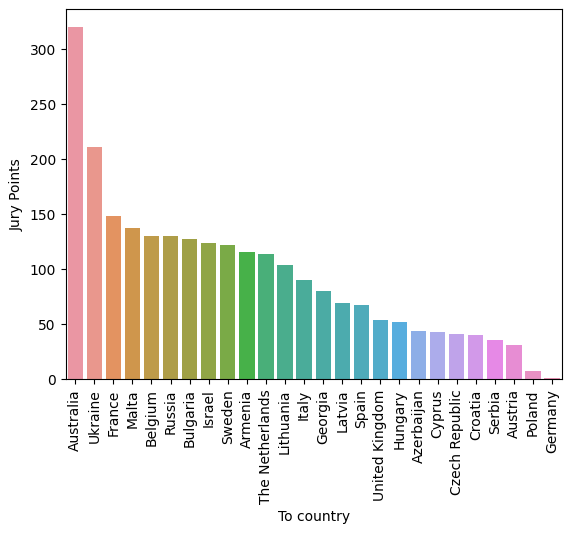

In [92]:
# plot the sum of points assigned by jury to each country
sns.barplot(data = jury_points_sum, 
            x = jury_points_sum.index,
            y = 'Jury Points'
          )
plt.xticks(rotation=90)
plt.show()

### Televoting results

In [93]:
df_televote = df[['From country','To country','Televote Rank','Televote Points']].dropna()
df_televote.sort_values(by=['Televote Rank'])

,From country,To country,Televote Rank,Televote Points
242,Croatia,Serbia,1,12.0
527,Hungary,Ukraine,1,12.0
750,Montenegro,Serbia,1,12.0
678,Lithuania,Latvia,1,12.0
922,Spain,Bulgaria,1,12.0
...,...,...,...,...
462,Germany,Italy,10,1.0
957,Sweden,Spain,10,1.0
122,Azerbaijan,Georgia,10,1.0
505,Greece,Austria,10,1.0


Contest results according to televotes:

In [94]:
televote_points_sum = df_televote.groupby('To country')[['Televote Points']].sum().sort_values(by= 'Televote Points',ascending=False)
televote_points_sum

,Televote Points
To country,
Russia,361.0
Ukraine,323.0
Poland,222.0
Australia,191.0
Bulgaria,180.0
Sweden,139.0
Armenia,134.0
Austria,120.0
France,109.0


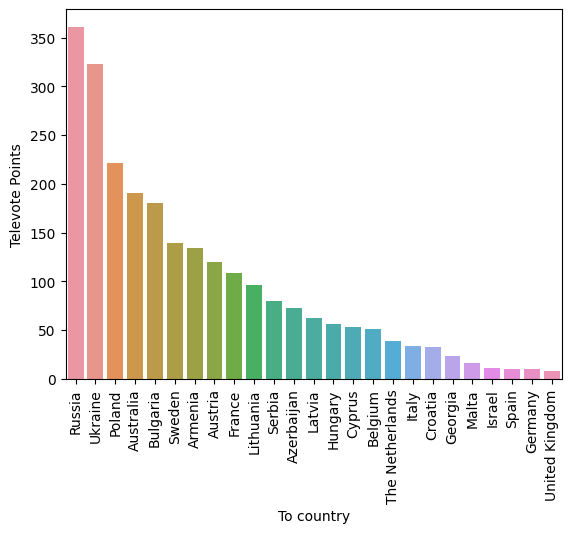

In [95]:
# plot the sum of points assigned by jury to each country
sns.barplot(data = televote_points_sum, 
            x = televote_points_sum.index,
            y = 'Televote Points'
          )
plt.xticks(rotation=90)
plt.show()

### Combined results

Text(0, 0.5, 'Received points')

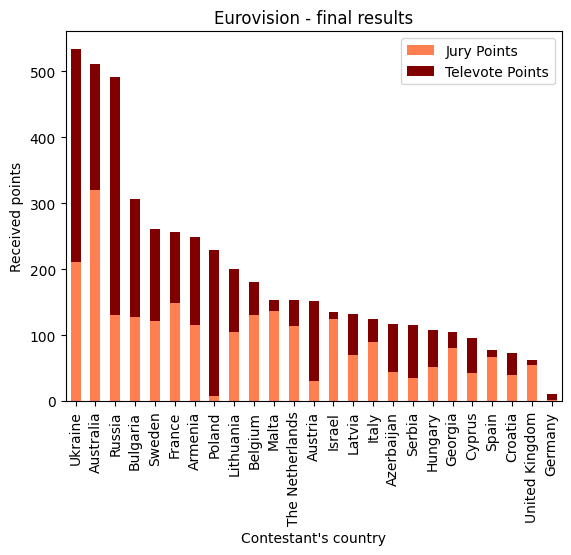

In [96]:
combined_points_sum = jury_points_sum.merge(televote_points_sum, on='To country')
combined_points_sum['Combined Points'] = combined_points_sum['Jury Points']+combined_points_sum['Televote Points']

combined_points_sum.sort_values(by=('Combined Points'), ascending=False, inplace=True)

combined_points = combined_points_sum[['Jury Points','Televote Points']]
combined_points.plot(kind='bar', stacked=True, color=['coral', 'maroon'])
plt.title('Eurovision - final results')
plt.xlabel('Contestant\'s country')
plt.ylabel('Received points')

## Relationship between jury and televotes

Let's try to find out whether there is a relationship between jury and televote points. I'm using ChiSq Test.

In [98]:
observed = combined_points_sum.drop(columns=['Combined Points'])
observed

,Jury Points,Televote Points
To country,,
Ukraine,211.0,323.0
Australia,320.0,191.0
Russia,130.0,361.0
Bulgaria,127.0,180.0
Sweden,122.0,139.0
France,148.0,109.0
Armenia,115.0,134.0
Poland,7.0,222.0
Lithuania,104.0,96.0


The combined results indicate that the data refer to the Eurovision Song Contest 2016: https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2016 <br>
The Winner: Ukraine <br>
2nd place: Australia <br>
3rd place: Russia

In [99]:
scipy.stats.chi2_contingency(observed = observed)

Chi2ContingencyResult(statistic=864.2922578896234, pvalue=5.2877755617803776e-167, dof=24, expected_freq=array([[264.73400952, 269.26599048],
       [253.33160836, 257.66839164],
       [243.41647692, 247.58352308],
       [152.19726765, 154.80273235],
       [129.39246533, 131.60753467],
       [127.40943904, 129.59056096],
       [123.44338646, 125.55661354],
       [113.52825502, 115.47174498],
       [ 99.15131443, 100.84868557],
       [ 89.73193956,  91.26806044],
       [ 75.85075554,  77.14924446],
       [ 75.85075554,  77.14924446],
       [ 74.85924239,  76.14075761],
       [ 66.92713724,  68.07286276],
       [ 65.43986752,  66.56013248],
       [ 61.47381495,  62.52618505],
       [ 58.00351894,  58.99648106],
       [ 57.0120058 ,  57.9879942 ],
       [ 53.54170979,  54.45829021],
       [ 51.5586835 ,  52.4413165 ],
       [ 47.59263093,  48.40736907],
       [ 38.17325605,  38.82674395],
       [ 36.19022977,  36.80977023],
       [ 30.73690747,  31.26309253],
       

Finally, we get a p-value of 5.2877755617803776e-167 which is a great deal smaller than 0.05. Therefore, we will reject the null hypothesis that says there is no relationship between the features. The test result detected a significant difference between Jury and Televote points.

## Investigating jury and televoting sympathies

I want to check, whether there are countries that vote for each other more willingly than other

In [101]:
df

,From country,To country,Jury Summary Order,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,106,25,14,NaN,NaN
1,Albania,Czech Republic,100,22,22,NaN,NaN
2,Albania,The Netherlands,104,24,24,NaN,NaN
3,Albania,Azerbaijan,74,13,19,NaN,NaN
4,Albania,Hungary,53,10,10,1.0,1.0
...,...,...,...,...,...,...,...
1061,United Kingdom,Ukraine,19,2,6,10.0,5.0
1062,United Kingdom,Malta,60,12,15,NaN,NaN
1063,United Kingdom,Georgia,10,1,19,12.0,NaN
1064,United Kingdom,Austria,81,17,13,NaN,NaN


In [112]:
df[['Jury Rank', 'Televote Rank']].astype(float)

,Jury Rank,Televote Rank
0,25.0,14.0
1,22.0,22.0
2,24.0,24.0
3,13.0,19.0
4,10.0,10.0
...,...,...
1061,2.0,6.0
1062,12.0,15.0
1063,1.0,19.0
1064,17.0,13.0


In [125]:
df_sympathy=pd.DataFrame(columns=['Country_1','Country_2', 'Jury_rank_sum', 'Televote_rank_sum'])

countries_list = rated_countries

for rated_country in countries_list:
    for voting_country in countries_list:
        if rated_country != voting_country:
            
            df1 = df.loc[(df['From country']==voting_country)&(df['To country']==rated_country), 
                         ['From country', 'To country','Jury Rank', 'Televote Rank']]
            df2 = df.loc[(df['From country']==rated_country)&(df['To country']==voting_country), 
                         ['From country', 'To country','Jury Rank', 'Televote Rank']]

            

            df_sympathy.loc[len(df_sympathy)] = [voting_country, rated_country, 
                                                 df1['Jury Rank'].values[0]+df2['Jury Rank'].values[0],
                                                 df1['Televote Rank'].values[0]+df2['Televote Rank'].values[0]]
    
    countries_list = countries_list[countries_list != rated_country]

In [127]:
df_sympathy

,Country_1,Country_2,Jury_rank_sum,Televote_rank_sum
0,Czech Republic,Belgium,19,43
1,The Netherlands,Belgium,14,3
2,Azerbaijan,Belgium,46,38
3,Hungary,Belgium,34,33
4,Italy,Belgium,13,31
...,...,...,...,...
320,United Kingdom,Georgia,14,41
321,Armenia,Georgia,18,4
322,United Kingdom,Austria,35,35
323,Armenia,Austria,31,19


In [161]:
df_sympathy.sort_values(by=['Jury_rank_sum'],inplace = True)
jury_sympathy = pd.concat([df_sympathy[:10],df_sympathy[-10:]])
jury_sympathy

,Country_1,Country_2,Jury_rank_sum,Televote_rank_sum
11,Australia,Belgium,2,8
85,Russia,Azerbaijan,3,6
274,Ukraine,Lithuania,4,10
140,Australia,Israel,4,20
304,Ukraine,Latvia,4,8
171,Armenia,Bulgaria,5,18
119,France,Italy,5,17
39,Croatia,Czech Republic,5,45
236,Lithuania,Australia,5,16
158,Australia,Bulgaria,6,8


In [162]:
jury_sympathy['Pair_of_countries'] = jury_sympathy['Country_1']+' + '+jury_sympathy['Country_2']
jury_sympathy.drop(columns=['Country_1', 'Country_2','Televote_rank_sum'], inplace = True)
jury_sympathy

,Jury_rank_sum,Pair_of_countries
11,2,Australia + Belgium
85,3,Russia + Azerbaijan
274,4,Ukraine + Lithuania
140,4,Australia + Israel
304,4,Ukraine + Latvia
171,5,Armenia + Bulgaria
119,5,France + Italy
39,5,Croatia + Czech Republic
236,5,Lithuania + Australia
158,6,Australia + Bulgaria


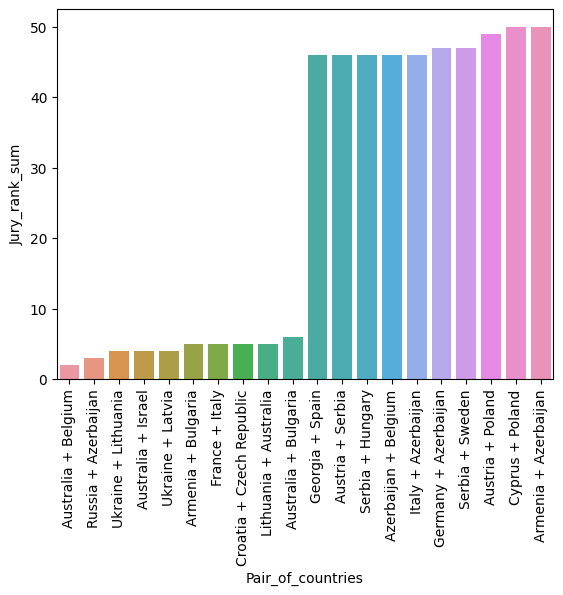

In [163]:
sns.barplot(data = jury_sympathy, 
            x = 'Pair_of_countries',
            y = 'Jury_rank_sum',
            errorbar=None
          )
plt.xticks(rotation=90)
plt.show()

As we can see, Australia and Belgium rated each other with highest possible rank. 
This may be a sign of mutual sympathy between the countries, especially since Belgium's final score in the jury vote is 5 (Australia got highest overall jury rank)
There are visible such pairs like Russia + Azerbaijan or Ukraine + Latvia that rated eaach other very high as well. This may be an expression of mutual historical ties, especially considering the low overall jury rank of Azerbaijan or Latvia.


Interestingly, there are two pairs of countries that rated each other's performance the lowest: Armenia + Azerbaijan and Poland + Cyprus. The first case is fully understandable due to the ongoing Nagorno-Karabakh conflict.
However, there are no ongoing conflicts between Poland and Cyprus, so it must be concluded that the juries from these countries simply did not like the performances of the other.

In [164]:
df_sympathy.sort_values(by=['Televote_rank_sum'],inplace = True)
televote_sympathy = pd.concat([df_sympathy[:10],df_sympathy[-10:]])
televote_sympathy['Pair_of_countries'] = televote_sympathy['Country_1']+' + '+televote_sympathy['Country_2']
televote_sympathy.drop(columns=['Country_1', 'Country_2','Jury_rank_sum'], inplace = True)
televote_sympathy

,Televote_rank_sum,Pair_of_countries
296,2,Armenia + Russia
1,3,The Netherlands + Belgium
291,3,Ukraine + Russia
228,4,Ukraine + Poland
174,4,Poland + Sweden
321,4,Armenia + Georgia
273,4,Latvia + Lithuania
88,4,Ukraine + Azerbaijan
219,5,Armenia + France
159,5,Cyprus + Bulgaria


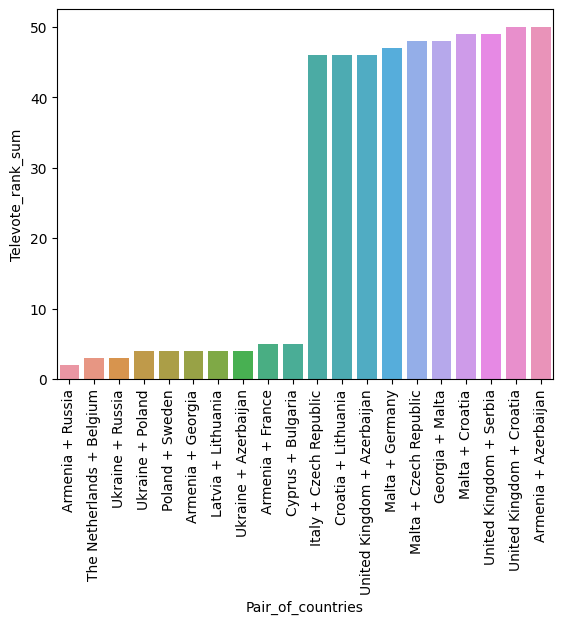

In [165]:
sns.barplot(data = televote_sympathy, 
            x = 'Pair_of_countries',
            y = 'Televote_rank_sum',
            errorbar=None
          )
plt.xticks(rotation=90)
plt.show()

As we can see above, there is visible mutual sympathy between tv-viewers from Armenia and Russia or The Netherlands + Belgium.

Mutual performances of their representatives were assessed the worst by Armenia + Azerbaijan (I would indicate same reason as by jury) and United Kingdom + Croatia. The latter one is very interesting, especially that UK Prime Minister Baroness Margaret Thatcher was one of the most keen advocates of the Croatian independence during the Croatian War of Independence in the 1990s.
Well, maybe in 2016 it was just about the songs.